# Machine Learning Models

In [2]:
#Import packages and set formatting options

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Read CSV File

In [3]:
df = pd.read_csv('feature_selected_train.csv')
df.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE,NONLIVINGAREA_MODE,OCCUPATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET
0,270000.0,0.0924,0.0529,0.0345,0.311267,0.622246,0.481121,0.2917,0.0130,0,Higher education,0.0000,Core staff,0.003541,1,0,0.0714,0.9851,45.931507,0.8040,3.254795,2.268493,0
1,225000.0,0.1502,0.0973,0.1379,0.478860,0.566907,0.770087,0.3333,0.0931,0,Secondary / secondary special,0.0000,Drivers,0.016612,2,0,0.1417,0.9806,38.591781,0.7452,8.295890,0.010959,0
2,189000.0,0.3561,0.1335,0.1724,0.721940,0.642656,0.481121,0.6667,0.1758,0,Secondary / secondary special,0.1060,Laborers,0.010006,2,0,0.3811,0.9985,39.953425,0.9804,0.556164,0.515068,0
3,112500.0,0.0284,0.0617,0.1034,0.478860,0.706428,0.556727,0.0833,0.0279,0,Secondary / secondary special,0.0000,Laborers,0.046220,1,0,0.0238,0.9881,48.542466,0.8432,21.380822,0.654795,0
4,135000.0,0.1460,0.1455,0.3103,0.478860,0.786179,0.565608,0.1667,0.0861,1,Secondary / secondary special,0.0045,Drivers,0.026392,2,0,0.0967,0.9861,30.920548,0.8171,2.043836,0.010959,0


In [4]:
df.shape

(80603, 23)

### Categorical Variable Encoding
After examining the cleaned and reduced training set, there are still two categorical variables that will need to be encoded before applying any machine learning models. Let's examine those first.

In [5]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    54306
Higher education                 22086
Incomplete higher                 3530
Lower secondary                    633
Academic degree                     48
Name: NAME_EDUCATION_TYPE, dtype: int64

Since there are only 5 categories present for education type, we can use One Hot Encoding with k-1 dummies created out of k categories. Before we proceed, let's examine the other categorical variable.

In [6]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 18363
Others                   13289
Sales staff              10219
Core staff                8379
Managers                  6415
Drivers                   5964
High skill tech staff     3966
Accountants               3263
Medicine staff            2463
Security staff            1981
Cooking staff             1718
Cleaning staff            1456
Private service staff      917
Low-skill Laborers         644
Secretaries                471
Waiters/barmen staff       406
Realty agents              280
HR staff                   209
IT staff                   200
Name: OCCUPATION_TYPE, dtype: int64

Since there is no clear ordinal positioning between different occupations, we can use One Hot Encoding for occupation type as well. We will use the pandas function get_dummies() to encode both categorical variables at the same time.

In [7]:
df = pd.get_dummies(df, columns = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'], drop_first = True)

In [8]:
df.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NONLIVINGAREA_MODE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Others,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,270000.0,0.0924,0.0529,0.0345,0.311267,0.622246,0.481121,0.2917,0.0130,0,0.0000,0.003541,1,0,0.0714,0.9851,45.931507,0.8040,3.254795,2.268493,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,225000.0,0.1502,0.0973,0.1379,0.478860,0.566907,0.770087,0.3333,0.0931,0,0.0000,0.016612,2,0,0.1417,0.9806,38.591781,0.7452,8.295890,0.010959,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,189000.0,0.3561,0.1335,0.1724,0.721940,0.642656,0.481121,0.6667,0.1758,0,0.1060,0.010006,2,0,0.3811,0.9985,39.953425,0.9804,0.556164,0.515068,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,112500.0,0.0284,0.0617,0.1034,0.478860,0.706428,0.556727,0.0833,0.0279,0,0.0000,0.046220,1,0,0.0238,0.9881,48.542466,0.8432,21.380822,0.654795,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,135000.0,0.1460,0.1455,0.3103,0.478860,0.786179,0.565608,0.1667,0.0861,1,0.0045,0.026392,2,0,0.0967,0.9861,30.920548,0.8171,2.043836,0.010959,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
df.shape

(80603, 43)

Both features OCCUPATION_TYPE and NAME_EDUCATION_TYPE have been encoded. The dataset is ready for modeling.

## Applying Machine Learning Models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

Let's start with splitting the dataframe into independent and dependent variables. The independent variable (y) will be the target variable and the dependent variables (X) will consist of all the remaining predictor variables.

In [10]:
X = df[df.columns[~df.columns.isin(['TARGET'])]].copy()
y = df['TARGET'].copy()

Next, we will split the data into a training and testing set, using a 70/30 split.

In [11]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Random Forest Classifier
We will use random forest, which combines many decision trees to try to accomplish better overall model performance. Let's start with the default parameters.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Feature Importance for out of the box model.

In [28]:
for feature, importance in zip(X_train.columns, pd.Series(classifier.feature_importances_).sort_values(ascending = False)):
    print('Feature',feature, 'Importance', importance)

Feature AMT_INCOME_TOTAL Importance 0.1730563670125941
Feature APARTMENTS_MODE Importance 0.14192914893431346
Feature BASEMENTAREA_AVG Importance 0.0867999469349453
Feature ENTRANCES_AVG Importance 0.08527633597143038
Feature EXT_SOURCE_1 Importance 0.06713900187524749
Feature EXT_SOURCE_2 Importance 0.059604067587653374
Feature EXT_SOURCE_3 Importance 0.057715337659170904
Feature FLOORSMAX_MODE Importance 0.057011271681022824
Feature LANDAREA_AVG Importance 0.04195055719607711
Feature LIVE_CITY_NOT_WORK_CITY Importance 0.03384318176600589
Feature NONLIVINGAREA_MODE Importance 0.0278353938601831
Feature REGION_POPULATION_RELATIVE Importance 0.025605589781960536
Feature REGION_RATING_CLIENT Importance 0.024293807300825775
Feature REG_CITY_NOT_LIVE_CITY Importance 0.02376108161186963
Feature TOTALAREA_MODE Importance 0.020078756921563325
Feature YEARS_BEGINEXPLUATATION_MODE Importance 0.019175940972013073
Feature YEARS_BIRTH Importance 0.009037931893981908
Feature YEARS_BUILD_MODE Import

In [29]:
print('\nClassification report: \n',classification_report(y_test, y_pred))


Classification report: 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     18462
          1       0.96      0.67      0.79      5719

avg / total       0.92      0.91      0.91     24181



In [30]:
from sklearn.metrics import accuracy_score
print('Accuracy score:',accuracy_score(y_test, y_pred))

Accuracy score: 0.9143955998511227


In [31]:
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))

Confusion matrix: 
 [[18299   163]
 [ 1907  3812]]


In [32]:
roc_auc_score(y_test, y_pred)

0.8288605751138206

In [33]:
print(pd.Series(y_pred).value_counts())
print(y_test.value_counts())

0    20206
1     3975
dtype: int64
0    18462
1     5719
Name: TARGET, dtype: int64


In [34]:
#Same as running roc_auc_score(y_test, y_pred) above
from sklearn.metrics import auc
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fp_rate, tp_rate)
roc_auc

0.8288605751138206

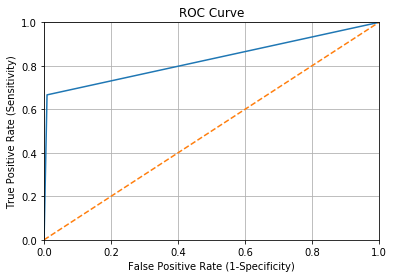

In [35]:
plt.plot(fp_rate,tp_rate)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

The baseline Random Forest Classifier model yielded an Area Under Curve of 0.83011. Let's try to tune the hyperparameters to see if we can improve this result.

In [68]:
#find optimal estimators n

for i in range(10,200,10):
    class2 = RandomForestClassifier(n_estimators = i, n_jobs = -1)
    class2.fit(X_train, y_train)
    y_pred = class2.predict(X_test)
    print('AUC score for', i, 'estimators is:', roc_auc_score(y_test, y_pred))
    
    

AUC score for 10 estimators is: 0.8286987637284852
AUC score for 20 estimators is: 0.8317004619196388
AUC score for 30 estimators is: 0.8357495955491482
AUC score for 40 estimators is: 0.8385993364817907
AUC score for 50 estimators is: 0.8368578383077478
AUC score for 60 estimators is: 0.8392773780146462
AUC score for 70 estimators is: 0.839294976920922
AUC score for 80 estimators is: 0.8396627931229783
AUC score for 90 estimators is: 0.8406766694943246
AUC score for 100 estimators is: 0.8384218307576855
AUC score for 110 estimators is: 0.8382299425762901
AUC score for 120 estimators is: 0.839789140873798
AUC score for 130 estimators is: 0.8416985564670861
AUC score for 140 estimators is: 0.8400977885011526
AUC score for 150 estimators is: 0.8418073053116297
AUC score for 160 estimators is: 0.8417849122529238
AUC score for 170 estimators is: 0.8403392569523896
AUC score for 180 estimators is: 0.8418025111591999
AUC score for 190 estimators is: 0.8406798859433103


Performance did not significantly improve as the number of estimators increased past a certain point. We will choose 60 estimators.

In [41]:
from sklearn.tree import export_graphviz
import pydot
tree = classifier.estimators_[5]

#export_graphviz(tree, out_file = 'tree.dot', feature_names = list(X_train.columns), rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('tree.png')

### Hyperparameter Tuning
Baseline predictive power is decent but let us see if we can do better with parameter tuning. Let's start by seeing what parameters the out of the box random forest model uses.

In [44]:
classifier.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We will adjust the following hyperparameters:
- bootstrap: method for sampling data points (with or without replacement)
- max_depth: max levels in each decision tree
- max_features: max features considered for splitting a node
- min_samples_leaf: min number of data points allowed in a leaf node
- min_samples_split: min number of data points put in a node before node is split
- n_estimators: number of trees in the forest

Since it will be too computationally expensive to exhaustively try every single parameter combination, we will use RandomizedSearchCV to take a random subset of possible parameter combinations.

In [51]:
from sklearn.model_selection import RandomizedSearchCV

bootstrap = [True, False]
max_depth = [i for i in range(10,100,10)]
max_depth.append(None)
max_features = ['sqrt', 'log2']
min_samples_leaf = [1, 2, 3, 4, 5]
min_samples_split = [i for i in range(2,12,2)]
n_estimators = [i for i in range(10,110,10)]

In [55]:
random_grid = {'bootstrap': bootstrap,
                'max_depth': max_depth,
                'max_features': max_features,
                'min_samples_leaf': min_samples_leaf,
                'min_samples_split': min_samples_split,
                'n_estimators': n_estimators}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [56]:
rf_cv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [2, 4, 6, 8, 10], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [57]:
rf_cv.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [58]:
rf_cv.best_score_

0.9205451774130659

In [61]:
rf_cv.grid_scores_

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91539, std: 0.00259, params: {'n_estimators': 10, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False},
 mean: 0.91480, std: 0.00330, params: {'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True},
 mean: 0.91011, std: 0.00304, params: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False},
 mean: 0.91395, std: 0.00314, params: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False},
 mean: 0.92035, std: 0.00275, params: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False},
 mean: 0.92001, std: 0.00286, params: {'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap':

In [62]:
best_pred = rf_cv.best_estimator_.predict(X_test)

In [63]:
roc_auc_score(y_test, best_pred)

0.8317227937314623

### XGBoost
Extreme Gradient Boosting

In [65]:
import xgboost as xgb

In [66]:
data_dm = xgb.DMatrix(data = X_train, label = y_train)

In [86]:
xg_class = xgb.XGBClassifier()
xg_class.fit(X_train, y_train)

y_pred = xg_class.predict(X_test)

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [87]:
print('Accuracy score:',accuracy_score(y_test, y_pred))

Accuracy score: 0.9202679789917704


In [88]:
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))

Confusion matrix: 
 [[18266   196]
 [ 1732  3987]]


In [89]:
roc_auc_score(y_test, y_pred)

0.8432667250579913

In [90]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid = {"max_depth": [10, 30, 50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [20],
              "learning_rate": [0.05, 0.1,0.16]}
grid_search = GridSearchCV(estimator = xgb.XGBClassifier(), param_grid = param_grid, cv = 3, verbose = 10, n_jobs = -1)

In [94]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 15.1min finished


{'learning_rate': 0.16,
 'max_depth': 10,
 'min_child_weight': 6,
 'n_estimators': 20}

In [95]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.16, max_delta_step=0,
       max_depth=10, min_child_weight=6, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [99]:
grid_search.best_score_

0.9231682676969977

In [101]:
grid_search.grid_scores_

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91865, std: 0.00175, params: {'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 20},
 mean: 0.91968, std: 0.00214, params: {'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 20},
 mean: 0.91952, std: 0.00229, params: {'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 20},
 mean: 0.91697, std: 0.00139, params: {'learning_rate': 0.05, 'max_depth': 30, 'min_child_weight': 1, 'n_estimators': 20},
 mean: 0.91895, std: 0.00167, params: {'learning_rate': 0.05, 'max_depth': 30, 'min_child_weight': 3, 'n_estimators': 20},
 mean: 0.92012, std: 0.00218, params: {'learning_rate': 0.05, 'max_depth': 30, 'min_child_weight': 6, 'n_estimators': 20},
 mean: 0.91709, std: 0.00158, params: {'learning_rate': 0.05, 'max_depth': 50, 'min_child_weight': 1, 'n_estimators': 20},
 mean: 0.91895, std: 0.00167, params: {'learning_rate': 0.05, 'max_depth': 50, 'min_child_weight': 3, 'n_estimators': 20},
 mean: 0.92012, 

In [102]:
best_pred_xgb = grid_search.best_estimator_.predict(X_test)

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [103]:
roc_auc_score(y_test, best_pred_xgb)

0.8415708791141036

In [104]:
print('Confusion matrix: \n',confusion_matrix(y_test, best_pred_xgb))

Confusion matrix: 
 [[18297   165]
 [ 1761  3958]]


In [81]:
from sklearn.metrics import mean_squared_error
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.2823685906899519


In [82]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada.score(X_test,y_test)

0.9165874033331954

In [83]:
roc_auc_score(y_test, ada.predict(X_test))

0.8429081059853494

### LightGBM

In [106]:
import lightgbm as lgb

In [107]:
#use cross val score - might be able to change parameter to precision or recall

lgb = lgb.LGBMClassifier()
lgb.fit(X_train, y_train)
lgb.score(X_test, y_test)

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.921715396385592

In [108]:
roc_auc_score(y_test, lgb.predict(X_test))

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8438525467329016

In [109]:
print('Confusion matrix: \n',confusion_matrix(y_test, lgb.predict(X_test)))

Confusion matrix: 
 [[18307   155]
 [ 1738  3981]]


C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [111]:
print(classification_report(y_test, lgb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     18462
          1       0.96      0.70      0.81      5719

avg / total       0.92      0.92      0.92     24181



C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Logistic Regression

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
#predict output with X test set
y_pred = logreg.predict(X_test)

In [93]:
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))

Confusion matrix: 
 [[18391     0]
 [ 5790     0]]


This model is predicting all target variables as the majority class - Every single applicant in the test set is predicted to not default on their loan. The accuracy score of 0.76 only reflects the values where Target = 0.

In [94]:
print('Accuracy score:',accuracy_score(y_test, y_pred))

Accuracy score: 0.7605558082792275


In [95]:
#this will output predicted values from the model given X_test, which is the smaller part of train test split that model has not seen
pd.Series(logreg.predict(X_test)).value_counts()

0    24181
dtype: int64

In [96]:
#changing sensitivity and specificity?
accuracy_score(y_test, logreg.predict(X_test), normalize = False)

18391

In [97]:
y_test[y_test ==1].shape  #16121 for y_pred, 12275+3846 = 16121

(5790,)

In [98]:
#Try log reg with different values for c

def reg_param_c(X,y, c_values, test_size):
    c_scores = {}
    for i in c_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
        logreg = LogisticRegression(C = i)
        logreg.fit(X_train, y_train)
        c_scores[i] = accuracy_score(y_test, logreg.predict(X_test))
    return c_scores

In [99]:
reg_param_c(X,y, [0.001, 0.1, 1, 10, 100], 0.3)

{0.001: 0.7623754187171746,
 0.1: 0.7596046482775733,
 1: 0.7629130308920227,
 10: 0.7601836152351019,
 100: 0.7629543856747033}

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

RecursionError: maximum recursion depth exceeded

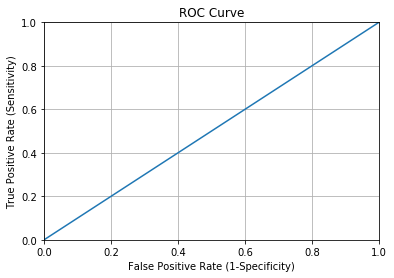

In [54]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

array([0., 1.])

In [55]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1- fpr[thresholds > threshold][-1])

In [56]:
evaluate_threshold(0.35)

Sensitivity: 0.0
Specificity: 1.0


In [ ]:
#What parameters to tune to have predictions that are 1 and 0

### Naive Bayes

In [69]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [87]:
#Function to plot ROC Curve and print score

def roc_curve(test, pred):
    fpr, tpr, thresholds = roc_curve(test, pred)
    print(auc(fpr, tpr))
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

In [103]:
bern = BernoulliNB(binarize = 0.1)
bern.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)

In [104]:
y_pred = bern.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('AUC:',roc_auc_score(y_test, y_pred))
#fpr, tpr = roc_curve(y_test, y_pred)

Accuracy score: 0.8455812414705761
AUC: 0.7395561619696651


In [105]:
multi = MultinomialNB()
multi.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [106]:
y_pred = multi.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('AUC:',roc_auc_score(y_test, y_pred))

Accuracy score: 0.7446342169471899
AUC: 0.6148519649310332


In [107]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)

GaussianNB(priors=None)

In [108]:
y_pred = multi.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('AUC:',roc_auc_score(y_test, y_pred))

Accuracy score: 0.7446342169471899
AUC: 0.6148519649310332
